In [5]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# encodage des mots en Int
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
#import cv2 # erreur import
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

# pour parser le fichier train.json
import json

In [6]:
with open('train.json', 'r') as f:
    datas = json.load(f) # id, cuisine, ingredients[]

csv = []
occurence = dict()
for data in datas:
    for ingredient in data['ingredients']:
        cuisine = data['cuisine']
        
        # Ajout de la ligne id-cuisine-ingredient
        tmp = dict()
        tmp['id'] = str(data['id'])
        tmp['cuisine'] = cuisine
        tmp['ingredient'] = ingredient
        csv.append(tmp)
        
        # Comptage de l'occurence
        if not cuisine in occurence:
            occurence[cuisine] = dict()
        if not ingredient in occurence[cuisine]:
            occurence[cuisine][ingredient] = 0
        occurence[cuisine][ingredient] += 1

# Ajout des occurences dans le CSV
for ligne in csv:
    cuisine = ligne['cuisine']
    ingredient = ligne['ingredient']
    ligne['occurence'] = occurence[cuisine][ingredient]


# $ingredients contient tous les ingredients possibles


train = pd.DataFrame(csv)

In [7]:
df = train.copy()

In [8]:
df.head()

,cuisine,id,ingredient,occurence
0,greek,10259,romaine lettuce,39
1,greek,10259,black olives,31
2,greek,10259,grape tomatoes,26
3,greek,10259,garlic,216
4,greek,10259,pepper,203


In [9]:
# Encodage des valeurs

#le_cuisine = LabelEncoder()
#le_ingredient = LabelEncoder()

#df['cuisine'] = le_cuisine.fit_transform(df['cuisine'])
#df['ingredient'] = le_ingredient.fit_transform(df['ingredient'])

# Pour inverser l'encodage il faudra utiliser ces deux lignes :
#df['cuisine'] = le_cuisine.inverse_transform(df['cuisine'])
#df['ingredient'] = le_ingredient.inverse_transform(df['ingredient'])

#df.head()

In [10]:
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [11]:
len(df['cuisine'].unique())

20

In [12]:
df['ingredient'].unique()

array(['romaine lettuce', 'black olives', 'grape tomatoes', ...,
       'lop chong', 'tomato garlic pasta sauce',
       'crushed cheese crackers'], dtype=object)

In [13]:
len(df['ingredient'].unique())

6714

In [14]:
# Pour verifier que toutes les donnees sont bonnes
df['cuisine'].isnull().sum()

0

In [15]:
# Pour verifier que toutes les donnees sont bonnes
df['ingredient'].isnull().sum()

0

In [16]:
# Creation de la matrix

index = list(df['cuisine'].unique()) #permet de supprimer les doublons
columns = list(df['ingredient'].unique())
index = sorted(index)
columns = sorted(columns)
 
util_df = pd.pivot_table(data = df, values = 'occurence', index = 'cuisine', columns = 'ingredient')

In [23]:
util_df

ingredient,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
cajun_creole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
french,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,41.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,86.0,0.0
greek,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,47.0,0.0
indian,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
irish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [18]:
util_df = util_df.fillna(0)

In [115]:

X = util_df
from sklearn.decomposition import NMF
#Décomposition du modèle en deux autres modèles 
n_component = 6
model = NMF(n_components=n_component, init='random', random_state=0)
W = model.fit_transform(X) #x -> cuisine avec 2 colonnes
H = model.components_ #y -> ingedient avec 2 colonnes

W2 = pd.DataFrame(W, index, ["type_ " + str(i+1) for i in range(len(W[0]))])
H2 = pd.DataFrame(H, ["type_ " + str(i+1) for i in range(len(H))], columns)

#realiser un heatmap ,convertir nos modèles en dataframe 
print(W) 
print(H2)

#possibilité de faire des prédictions avec l'un des deux models, distance 

W_df = pd.DataFrame(csv)

[[1.86563835e-01 4.95213617e-01 6.79326672e-02 1.72330092e-01
  8.10404767e-02 1.71187572e-01]
 [0.00000000e+00 1.47599690e-01 0.00000000e+00 0.00000000e+00
  5.21160648e-02 2.09563298e+00]
 [4.95030712e+00 1.43909786e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.52340098e-01]
 [1.76313212e-01 0.00000000e+00 6.71961312e+00 0.00000000e+00
  0.00000000e+00 3.03791092e-01]
 [5.19723369e-01 3.87808940e-01 8.42869047e-01 5.44729432e-02
  2.44489213e-01 2.35219674e-01]
 [0.00000000e+00 4.75707287e+00 9.22017299e-02 0.00000000e+00
  4.00119254e-02 4.02579699e+00]
 [2.40206301e-01 3.97968825e+00 0.00000000e+00 1.93335378e-01
  9.16619902e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.05220175e+00 3.97177698e-01]
 [1.21900914e-01 1.82105032e-01 0.00000000e+00 0.00000000e+00
  5.45838287e-02 1.64112859e+00]
 [1.02236512e-01 3.21276432e+01 2.00494540e-02 9.17096658e-02
  0.00000000e+00 3.48192285e-01]
 [5.06193018e-01 1.53594101e-01 2.93126266e-01 1.3

In [112]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import bokeh as bkh


In [122]:
#nos datas 
n_samples = len(W);
seed = np.random.RandomState(seed=3)
X_true = W
X_true = X_true.reshape((n_samples, n_component)) ##regroupement en 2 de nos données 
similarities = euclidean_distances(X_true) ##distance eucledienne comme nous a demandé le prof 


mds = manifold.MDS(n_components= 2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
print(pos)

[[-1.00991241 -0.83682327]
 [ 0.43019289 -2.01856723]
 [-5.41324273 -1.79455953]
 [-3.02719762 -6.65211307]
 [-1.38691382 -1.30463937]
 [ 3.95906558  0.57302392]
 [ 0.72611591  1.7429158 ]
 [-3.28489066  1.29984137]
 [ 0.08424553 -1.75760659]
 [18.50075357 23.35614492]
 [-1.07814246 -1.19975612]
 [-1.4412584  -2.65977803]
 [-1.78787691 -2.28617489]
 [-8.4099169   5.57309596]
 [-0.49297875  0.24544099]
 [-0.33781865 -1.47376773]
 [ 7.48893989 -7.49496345]
 [ 0.0860698   0.89234374]
 [-2.06516376 -2.39901607]
 [-1.54007009 -1.80504136]]


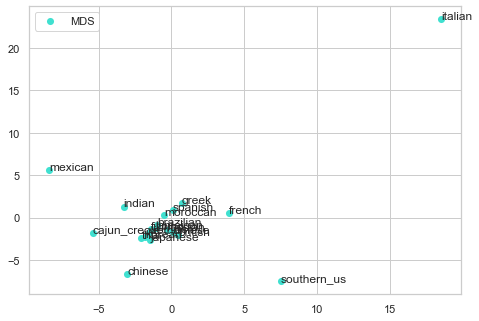

In [145]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 50

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')

plt.legend(scatterpoints=1, loc='best', shadow=False)

for i, txt in enumerate(index):
    ax.annotate(txt, (pos[i][0], pos[i][1]))



In [132]:
from bokeh.plotting import figure, show, output_file

In [156]:

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(tools=TOOLS)


colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*pos[:, 0], 30+2*pos[:, 1])
]
p.scatter(pos[:, 0], pos[:, 1], fill_color= colors, fill_alpha= 1, line_color=None)


show(p)
